E:\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


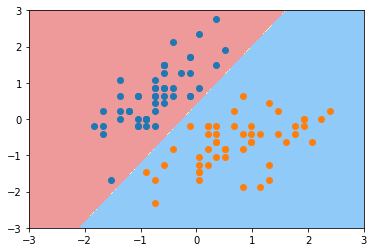

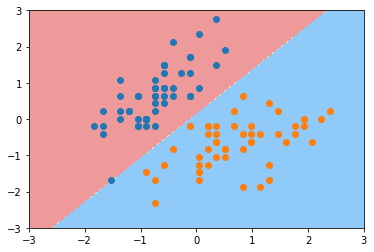

[[ 4.03241944 -2.49297914]]
[0.95366726]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
X = X[y<2,:2]
y = y[y<2]

from sklearn.preprocessing import StandardScaler#数据标准化
standardScaler = StandardScaler()
standardScaler.fit(X)
X_standard = standardScaler.transform(X)

from sklearn.svm import LinearSVC#support vector classifier
svc = LinearSVC(C=1e9)
svc.fit(X_standard, y)

def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)
plot_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()



svc2 = LinearSVC(C=0.1)
svc2.fit(X_standard, y)

plot_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()

print(svc.coef_)#二维数组，系数，因为可以进行多分类，可以返回多条直线（超平面）
print(svc.intercept_)#截距

E:\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


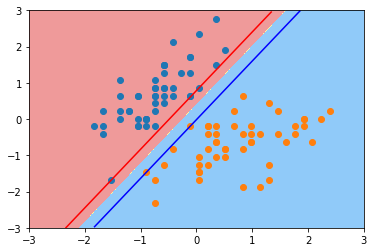

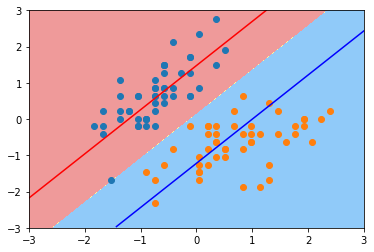

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
X = X[y<2,:2]
y = y[y<2]

from sklearn.preprocessing import StandardScaler#数据标准化
standardScaler = StandardScaler()
standardScaler.fit(X)
X_standard = standardScaler.transform(X)

from sklearn.svm import LinearSVC#support vector classifier
svc = LinearSVC(C=1e9)
svc.fit(X_standard, y)
svc2 = LinearSVC(C=0.1)
svc2.fit(X_standard, y)
#print(svc)#(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
          #intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          # multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          #verbose=0)

def plot_svc_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)
    
    w = model.coef_[0]
    b = model.intercept_[0]
    
    # w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y = -w[0]/w[1] * plot_x - b/w[1] + 1/w[1]#画出每个x对应的y
    down_y = -w[0]/w[1] * plot_x - b/w[1] - 1/w[1]#一共上下两条直线
    
    up_index = (up_y >= axis[2]) & (up_y <= axis[3])#可能超出axis数组里的范围
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    
    plt.plot(plot_x[up_index], up_y[up_index], color='blue')
    plt.plot(plot_x[down_index], down_y[down_index], color='red')
    
plot_svc_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()

plot_svc_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()